# Experiência de Millikan

$m= \rho \frac{4}{3} \pi  R^3 $    
$F_a= - k \eta v$   
$   \frac{d v}{dt} =  g -  \frac{k \eta}{m} v$

Solução Analítica   $v(t)= \frac{m g}{k \eta} (1 - e^{-( k \eta/m) t}  ) = v_L (1 - e^{-t/\tau})$   
$\tau= k \eta / m  $ ,  $v_L= \frac{m g}{k \eta}  $

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
#from matplotlib.ticker import MultipleLocator
import numpy as np
from scipy import constants # Constantes Físicas
from scipy.integrate import odeint
import ipywidgets as widgets

In [74]:
#Raio da gota
R=9e-7
k=6*np.pi*R
#18,52 · 10−6 Pa·s (viscosidade do ar a 23 ◦C)
n=18.52e-6
#Distância entre placas
d=5e-3
#massa da gota
m=4.0/3.0*np.pi*R**3*973
g=9.8
ro=973
tau=m/k /n
tau

9.456803455723542e-06

## Solução do movimento por integração numérica da equação diferencial

In [75]:
def Queda(y, t, b, c):
    z, vz = y
    dydt = [vz, b + c * vz]
    return dydt

In [80]:
#condições iniciais (z_0,vz_0)
y0 = [0.0, 0.0]
t = np.linspace(0, 1e-4, 101)
sol = odeint(Queda, y0, t, args=(-g, -k *n / m))

<IPython.core.display.Javascript object>


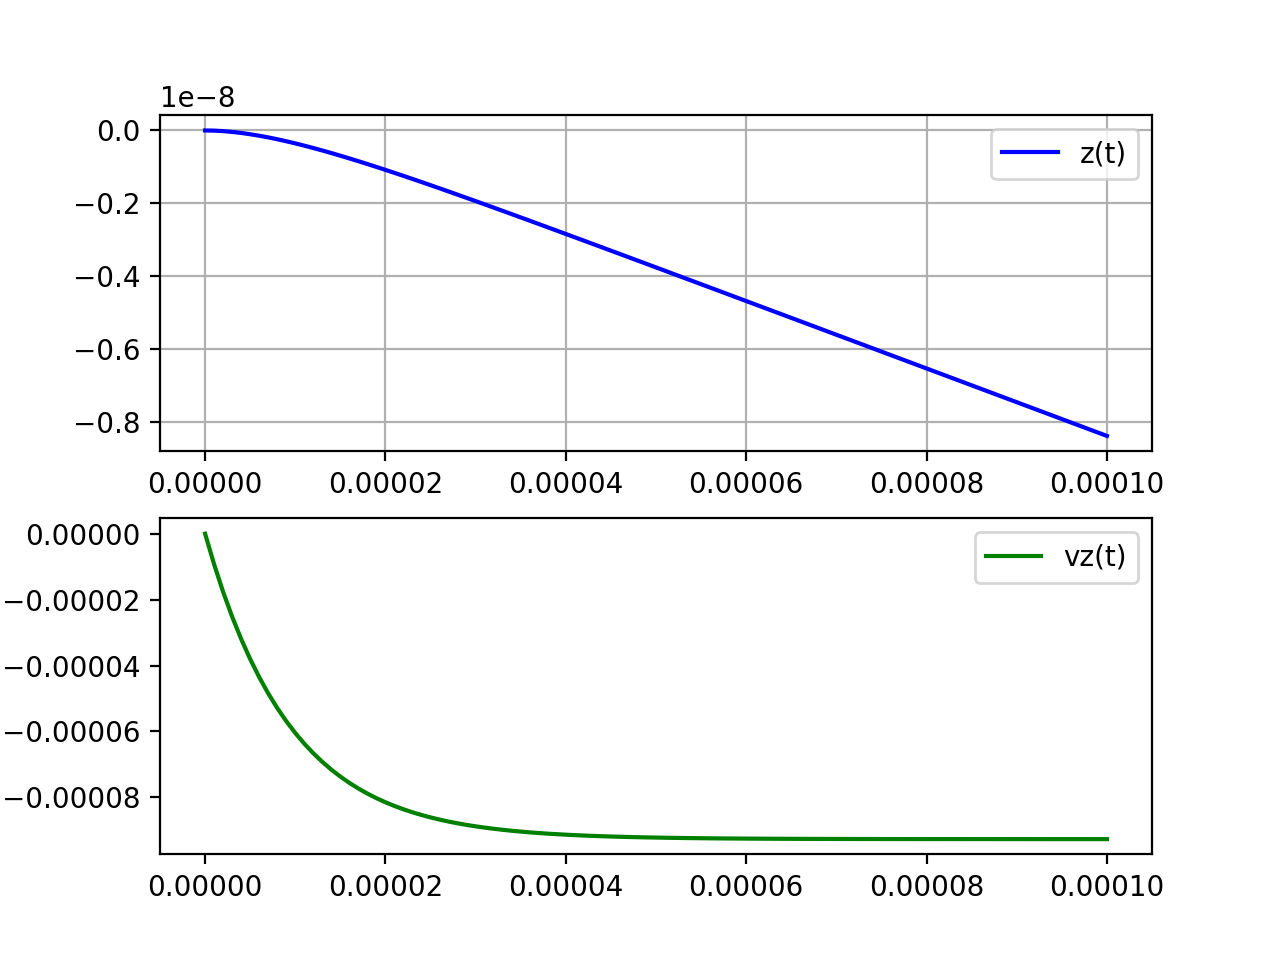

In [81]:
fig = plt.figure()
ax1 = fig.add_subplot(211) #, autoscale_on=False, xlim=(0, 10), ylim=(-1, 1))
ax2 = fig.add_subplot(212) #, autoscale_on=False, xlim=(-1, 1), ylim=(-1, 1))

#ax1.plot(theta, y,label='Emitido-CH1')
ax1.plot(t, sol[:, 0], 'b', label='z(t)')
ax1.grid()
ax2.plot(t, sol[:, 1], 'g', label='vz(t)')
ax1.legend(loc='best')
ax2.legend(loc='best')
#ax1.xlabel('t')
fig.show()


# Cálculo da Carga da gota

$ R = \sqrt{ \frac{9 v_L \eta_{ar}}{2 g (\rho_{oleo} - \rho_{ar})}  }$   
$q=\frac{6 \pi R \eta_{ar} d v_L }{U}$

In [82]:
#Medidas Experimentais
T=20.465
#Distância percorida
D=2.0e-3
U=240.5

In [83]:
vL=D/T
R=np.sqrt(9 * vL * n / (2*g*(ro)))
print "Velocide Limite: %g m/s" % vL
print "Raio da Gota: %g m" % R

Velocide Limite: 9.77278e-05 m/s
Raio da Gota: 9.24201e-07 m


In [84]:
q=(6*np.pi*R*n*d*vL)/U
print "Carga da Gota: %g C" % q

Carga da Gota: 6.55514e-19 C


In [85]:
print "Carga do Electrao: %g C" %constants.e 

Carga do Electrao: 1.60218e-19 C


## Correção Lei de Stokes

In [86]:
b =7.88e-3
#Pressão atmosferica em Pascal
p=101325 

In [87]:
qp=q*(1.0/(1.0 + b/(p*R)))**(3.0/2.0)

In [88]:
qp

5.8069608800900241e-19